<a href="https://colab.research.google.com/github/Pras89tyo/TA/blob/main/FIX_SISTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# ========================
# STEP 1: Mount Google Drive
# ========================
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# ========================
# STEP 2: Import Library
# ========================
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [9]:
# ========================
# STEP 3: Path Dataset
# ========================
dataset_path = '/content/drive/MyDrive/potato_leaf_disease'
train_dir = os.path.join(dataset_path, 'Training')
val_dir = os.path.join(dataset_path, 'Validation')

In [10]:
# ========================
# STEP 4: Image Preprocessing
# ========================
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3251 images belonging to 3 classes.
Found 416 images belonging to 3 classes.


In [11]:
# ========================
# STEP 5: Load VGG16 Model
# ========================
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = True  # Aktifkan semua layer

# Fine-tuning hanya layer akhir saja (lebih aman)
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Bangun model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,846,787 (56.64 MB)

 Trainable params: 7,211,523 (27.51 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [12]:
# ========================
# STEP 6: Train Model
# ========================
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2803s 27s/step - accuracy: 0.5856 - loss: 0.8596 - val_accuracy: 0.9135 - val_loss: 0.2590
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2794s 27s/step - accuracy: 0.8562 - loss: 0.3880 - val_accuracy: 0.9279 - val_loss: 0.1860
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2796s 27s/step - accuracy: 0.9278 - loss: 0.2044 - val_accuracy: 0.8942 - val_loss: 0.2398
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2828s 28s/step - accuracy: 0.9301 - loss: 0.1941 - val_accuracy: 0.9712 - val_loss: 0.1129
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2784s 27s/step - accuracy: 0.9442 - loss: 0.1581 - val_accuracy: 0.9495 - val_loss: 0.1326
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2778s 27s/step - accuracy: 0.9598 - loss: 0.1265 - val_accuracy: 0.9663 - val_loss: 0.1078
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2773s 27s/step - accuracy: 0.9545 - loss: 0.1428 - val_accuracy: 0.9399 - val_loss: 0.1295
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2834s 28s/step - accuracy: 0.9723 - loss: 0

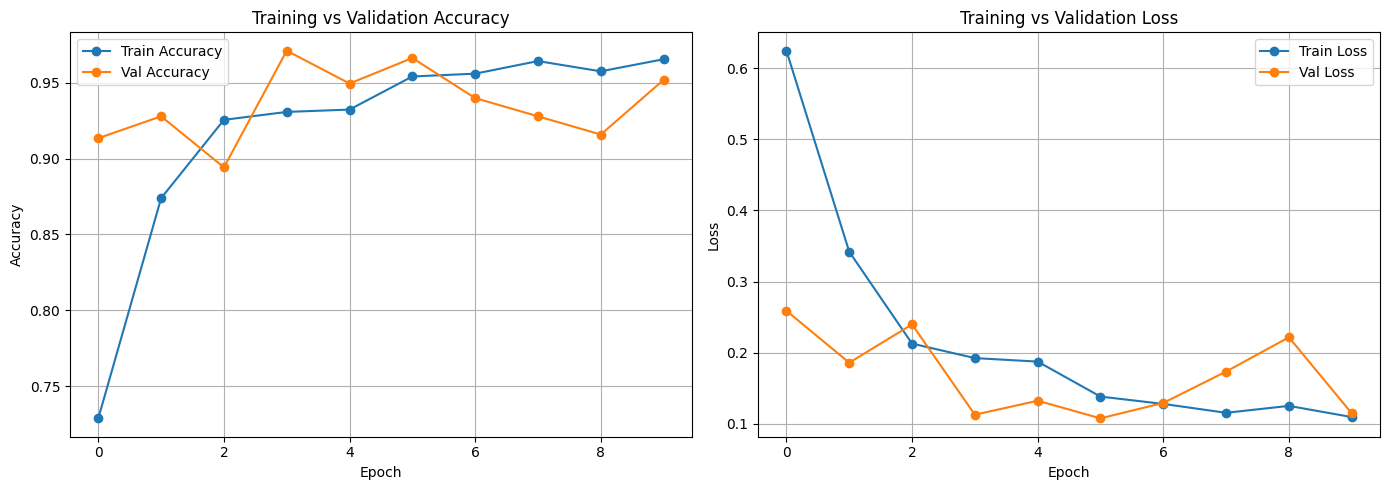

In [13]:
# ========================
# STEP 6.1: Visualisasi Training
# ========================
plt.figure(figsize=(14, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [14]:
# ========================
# STEP 7: Simpan Model
# ========================
model.save('/content/drive/MyDrive/potato_model_vgg16_augmented.h5')

13/13 ━━━━━━━━━━━━━━━━━━━━ 268s 20s/step


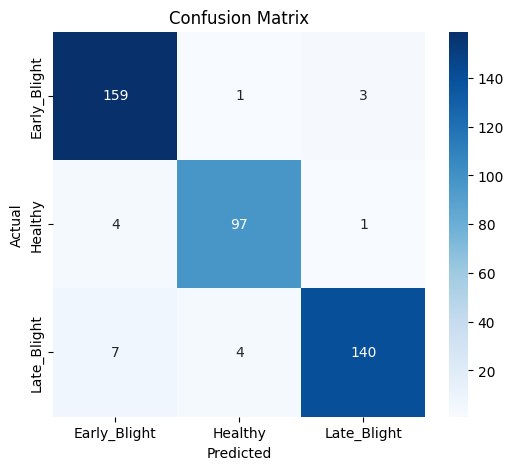

              precision    recall  f1-score   support

Early_Blight       0.94      0.98      0.95       163
     Healthy       0.95      0.95      0.95       102
 Late_Blight       0.97      0.93      0.95       151

    accuracy                           0.95       416
   macro avg       0.95      0.95      0.95       416
weighted avg       0.95      0.95      0.95       416



In [15]:
# ========================
# STEP 8: Evaluasi Model - Confusion Matrix
# ========================
val_data.reset()
Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_data.classes
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_data.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_names))